# Project: Financial time series forecasting

$ Version: 4.3 $

$ Date: 14.09.2023 $

The following project is an individual piece of work, and you are not allowed to share your solution with anyone else.

The primary aim of the project is for you to learn how to set up an analytics project from end-to-end. A secondary aim is for you to understand how to work with a time-series dataset and make forecasts based on such data. A third aim is for you to gain insight into how to interpret data and results.

To earn a higher grade, you must complete the preceding grade *without errors*; for example, you must complete grade one without errors before moving on to grade two, and so on.

Your code will be tested on the notebooks.csc.fi (https://notebooks.rahtiapp.fi) workspace, specifically the "BDA 23-24 Intro", application "Introduction to Analytics 23". If your code does not run in this environment, it will not be accepted.

**Please clean up and format your code neatly before submitting it.** A draft-style submission with repeating code could negatively impact your grade.

You are advised to allocate approximately 60 hours for self-study to complete this project.

It's possible that some information may be unintentionally missing from the project description. We recommend going through the description well in advance, so you have ample time to ask for clarification at https://matrix.to/#/!xqckvzVvBRlUqnveXA:matrix.org?via=matrix.org.

## <span style="color: green">Happy coding!</span> 👩‍💻



<a id='toc'></a>
# TOC

[Grade 1](#g1)

[Grade 2](#g2)

[Grade 3](#g3)

[Grade 4](#g4)

[Grade 5](#g5)


In [1]:
# First upgrade the environment.
# import pip
from subprocess import run
# add & upgrade what you will need
modules =[
    'pandas_market_calendars',
    'plotly', 
    'numpy',
    'scikit-learn',
    'pandas',
    'matplotlib'
]
proc = run(f'pip install {" ".join(modules)} --upgrade --no-input', 
       shell=True, 
       text=True, 
       capture_output=True, 
       timeout=120) #a couple of minutes
print(proc.stderr)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Bindu\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




In [2]:
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter, StrMethodFormatter
%matplotlib inline

import plotly as ply
import plotly.graph_objects as go

import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

from functools import reduce
from operator import mul
from pprint import PrettyPrinter
pprint = PrettyPrinter().pprint

In [3]:
print(f'pandas version {pd.__version__ }')

pandas version 1.5.3


<a id='g1'></a>
# Grade 1
## Implement a complete process for forecasting the one-day-ahead Close value of the EUR/USD exchange rate, using a historical dataset with one-minute resolution.

You should do the following steps:
- Download once the [EUR/USD data set](https://people.arcada.fi/~parland/hjd5_8amp_Gt3/EURUSD1m.zip) (52Mb) and convert the index to [DatetimeIndex](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)
`pd.read_csv("https://people.arcada.fi/~parland/hjd5_8amp_Gt3/EURUSD1m.zip", compression='zip', [other usefull parameters...])`

- Subsample data to one-day time steps, ensuring you also include data from weekends.

- Create a 'Label' column for your forecast by shifting the Close value one step forward. You will be predicting one day ahead.

- Split the data into an 80/20 ratio (train/test). Be cautious: you are splitting a time series.


- [Normalize or standardize](https://scikit-learn.org/stable/modules/preprocessing.html) wisely so you don't allow information leakage to the test subset. Note, that utility class [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html) performs scaling **individual samples to have unit norm**, so it is not useful for certain tasks. Write your own function or check [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

- Please check in which order you perform split and scale. The order in which you perform the split and scaling is crucial, especially for time series data, and each approach has its pros and cons:

1. **Data → X, y → scale → split → X_test, y_test ; X_train, y_train**: 
    - **Pros**: Easier to implement because you're scaling everything all at once.
    - **Cons**: You're scaling the test set based on the statistics of the entire dataset, including the test set itself, which is often considered a form of data leakage. This can potentially give you overly optimistic evaluations of your model's performance.

2. **Data → X, y → split → scale → X_test, y_test ; X_train, y_train**:
    - **Pros**: You're not leaking information from the test set into the training set. The training set is scaled based on its own statistics, and the test set is similarly scaled based on the training set's statistics.
    - **Cons**: A bit more cumbersome to implement, as you have to fit the scaler to the training data and then use it to transform both the training and test data.

**Note**: When you transform the data, you indeed have to transform your forecasts back into their original form to make them interpretable. Saving the parameters used for normalization or standardization is essential for this "de-normalization" process. This is especially important in the second approach, where the test set is scaled based on the statistics of the training set.

- Calculate the technical analysis feature [Larry William’s %R](https://www.investopedia.com/terms/w/williamsr.asp) from the paper [Predicting the Direction of Stock Market Index Movement Using an Optimized Artificial Neural Network Model](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4873195) (implement in code, insert values in a complementary column). 

**Note that you need to implement your own calculation of each feature and be able to explain the code.**

- Drop other data than the Close and the features for training and inference. You don't want to feed time-column into the model, it's usually not a feature to base your prediction on. 

- Fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) to the training data

- Forecast one day ahead based on the test data

- Calculate the [R² error](https://en.wikipedia.org/wiki/Coefficient_of_determination) on both the training data set and the test. Please format numbers to four [significant digits](https://en.wikipedia.org/wiki/Significant_figures). As a check you may note that values suppose to be in the range 0.975 … 0.993 for test and 0.995 … 0.998 for train. If you get R² error outside these ranges it **indicates** that you are highly likely to have an error in your program logic.

**NB! You may also get an expected result by performing several cumulative mistakes. Imagine a question:**  

$$ (2+1)\times 3 = ?$$

$$ \text{Erroneous attempt: each step is wrong, the end result is right...} $$
$$ 2+1=4 $$
$$ 4\times 3 = 9 $$
$$ \text{Answer: } 9 $$

**The objective of this assignment is not to achieve a correct result but to achieve the result correctly.**

- Compare the R² errors for test and train and explain the outcome. 

- Extra: Test your model (get R² errors for test and train without LW%R, just Close column). Comment and explain the result. A reasonable explanation will compensate for one error in the following grades.


### **Larry William’s %R**

$ (H_n − C_t)/(H_n − L_n)\times100 $

Where:

- $ H_n $: The highest price reached during the specified period $ n $.
- $ C_t $: The closing price at time $ t $.
- $ L_n $: The lowest price reached during the specified period $ n $.

The idea behind the %R indicator is to measure the level of the close relative to the range of prices (high to low) over a set period of time. 

### Coefficient of determination ($R^2$)

$$R^2 = 1 - \frac {SS_{Resid}}{SS_{Tot}}$$

#### Residual Sum of Squares: $SS_{Resid} = \sum_{i} (y_i - \hat{y_i})^2$

#### Total Sum of Squares: $SS_{Tot} = \sum_{i} (y_i - \bar{y})^2$

#### A baseline model, which always predicts $\bar {y}$, will have $R^2 = 0$

Below is an example code for a Disparity Index feature calculation for 5 days: $ \frac {C_t}  {\text{MA}_5} \times 100 $
([See the explanation](https://www.investopedia.com/terms/d/disparityindex.asp))

In [ ]:
# example
def disparity_5(df):
    return 100 * df['Close'] / df['Close'].rolling(window=5).mean()

df['Disparity_5'] = disparity_5(df)

<a id='g2'></a>
# Grade 2
## Illustrate data using [plotly](https://plotly.com/python/getting-started/) (or other) library

- Calculate an additional feature [Stochastic slow %D](https://www.investopedia.com/ask/answers/05/062405.asp)
- Create a figure based on OHLC candles **covering the test period** (the 20% of data)
- Add a line to the chart that illustrates the *label* (actual data) and the *forecast* (so candels and lines are in the same figure. The lines should have different colors and include names of the series.
- Add **subplot(s)** with the LW%R and Stochastic slow %D features, below the figure with OHLC, label and forecast, so we can see all time-aligned. Don't forget to sclae back the predicted values to the original range.
- What patterns can you observe from the line figure?

### Stochastic %K	
<br>
<span style='font-size:20px'>
$\frac{(C_t − L_n)}{(H_n − L_n)}\times100$
 </span>   
  
  Where:

- $ H_n $: The highest price reached during the specified period $ n $.
- $ C_t $: The closing price at time $ t $.
- $ L_n $: The lowest price reached during the specified period $ n $.


    
### Stochastic %D
<br>
<span style='font-size:20px'>
$\sum\nolimits_{i=0}^{n-1}\frac{\%K_{t-i}}n$
</span>
    
### Stochastic slow %D
<br>
<span style='font-size:25px'>
$\frac{\sum_{i=0}^{n-1}\%D_{t-i}}n$
</span>

<a id='g3'></a>
# Grade 3

- Calculate additional feature [RSI (relative strength index)](https://www.investopedia.com/terms/r/rsi.asp)
- Add the feature as a subplot to the figure in the previos step
- Set up an [ElasticNet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) (**not** an [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)) model
- Fit/train the ElasticNet to the training data
- Forecast and calculate the R² error on both the training data set and the test
- Add your new *forecast* line to the previos figure, so the predictions from both models are placed over each other and can be compared
- Compare the errors and explain the outcome

### RSI
<br>
<span style='font-size:25px'>
$100-\frac{100}{\left(1+\frac{\frac{\sum_{i=0}^{n-1}Up_{t-i}}{\text{n}}}{\frac{\sum_{i=0}^{n-1}Dw_{t-i}}{\text{n}}}\right)} $
    </span>

Example:
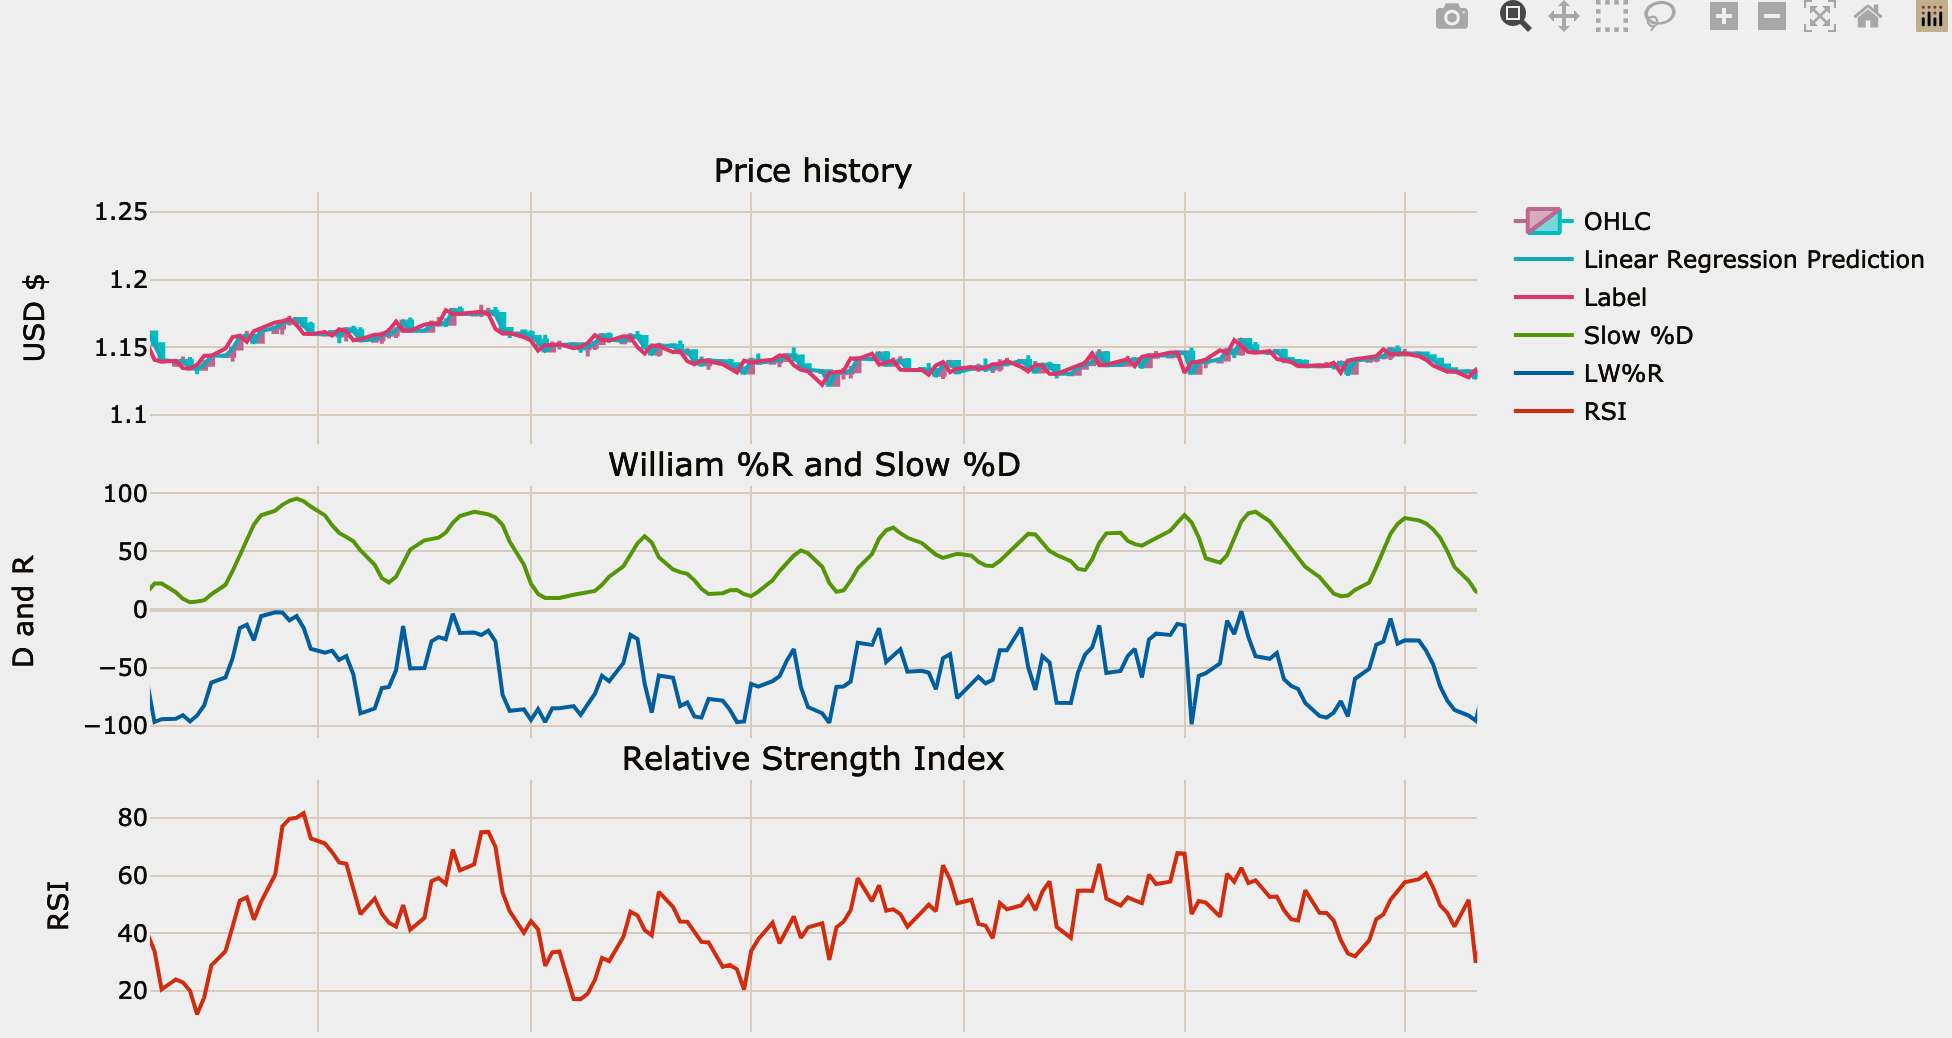

<a id='g4'></a>
# Grade 4

- Calculate additional feature [On Balance Volume](https://www.investopedia.com/terms/o/onbalancevolume.asp)
- Create sliding windows for the input data, e.g. the window length of 10, 5, and 2 samples. You will extract data for the window length n (rows), and turn the data from a matrix (2D) form into a vector form of the size $R\times C$ (i.e. number of rows × number of columns in the window) [NumPy Array Reshaping](https://www.w3schools.com/python/numpy_array_reshape.asp). You will probably need to create a function that returns a vector (array, tuple, list, Series). Other solutions are also possible. Here is an example of two days window for two features attached to the original data:

|     | a | b   | a-1 | b-1 | a-2 | b-2 |
|:---:|:-:|:---:|:---:|:---:|:---:|:---:| 
| t₁  | 0 |	1   | nan | nan | nan | nan |	
| t₂  | 2 |	3   | 0   | 1   | nan | nan |
| t₃  | 4 |	5   | 2   | 3   | 0	  | 1   | 
| t₄  | 6 |	7   | 4   | 5   | 2	  | 3   | 
| t₅  | 8 |	9   | 6   | 7   | 4	  | 5   |

- Set up a [Polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)
- Fit and run all three different models (on all features) for all three different window lengths
- Summarize and compare their R² error measures. Is anyone better than the [LinearRegression model](https://en.wikipedia.org/wiki/Linear_regression) without window information attached?

| Mod  | no window |  2 |  5 | 10 |
|:----:|:--:|:--:|:--:|:--:|
|  M₁  | R² | R² | R² | R² |
|  M₂  | R² | R² | R² | R² |
|  M₃  | R² | R² | R² | R² |


### **On Balance Volume**

$ OBV_t = OBV_{t − 1} + \theta \times V_t $

where $V_t$ is the volume of trade at time $t$, and 

(*classic definition*) $ \theta = 
\begin{cases}
  +1, & \textit{if} \ C_t > C_{t−1} \\
  0, & \textit{if} \ C_t = C_{t−1} \\
  –1, & \textit{otherwise}
\end{cases}
$  <br /><br /> or  (*definition from the paper*) $ \theta = 
\begin{cases}
  +1, & \textit{if} \ C_t \geq C_{t−1} \\
  –1, & \textit{otherwise}
\end{cases}
$


<a id='g5'></a>
# Grade 5
Implement an investment decision to either buy or sell based on some signals which you choose to detect. 
See the paper for how this can be done, the easiest solution is to hand-craft this decision to either buy or sell.

- Compare the regression forecast with the known Close price.
- Once the forecast go above Close price you can define a buy opportunity
- You can decide to keep and hold if forecasted difference small or based on other signals.
- Calculate the Hit Ratio (HR) of your investment decision for each of the windows. The HR is the number of times a correct prediction has been made in relation to the total number of predictions. For example, if 10 predictions were correct out of 50, the HR would be 1:5 or 0.2
- Forecast one week ahead and compare the HR with one day ahead forecast
- Which setup was the best, and why was that?
